<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/invariance_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Invariance fundamentals

So what’s invariance? In the context of neural networks, it means that the outcome
(the prediction) is unchanged when the input is transformed. In the context of training
an image classifier, image augmentation can be used to train a model to recognize
an object regardless of the object’s size and location in the image, without the need
for additional training data.

Let’s consider a CNN that is an image classifier (this analogy can also be applied to
object detection). We want the object being classified to be correctly recognized
regardless of its location in the image. If we transform the input so that the object is
shifted to a new location in the image, we want the outcome (the prediction) to
remain unchanged.

For CNNs and imaging in general, the primary types of invariance we want the
model to support are translational and scale invariance.

One approach to training for translational/scale invariance is simply to have
enough images per class (per object), so that the object is in different locations in the image, different rotations, different scales, and different view angles. Well, this may
not be practical to collect.

It turns out there is a straightforward method of autogenerating translational/
scale invariant images using image augmentation preprocessing, which is performed
efficiently using matrix operations. 

Matrix-based transforms can be done by a variety
of Python packages, such as the TF.Keras ImageDataGenerator class, TensorFlow
tf.image module, or OpenCV.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/9.png?raw=1' width='800'/>

It depicts a typical image augmentation pipeline when feeding training
data to a model. For each batch drawn, a random subset of the images in the batch are
selected for augmentation (for example, 50%). Then, this randomly selected subset of
images is randomly transformed according to certain constraints, such as a randomly
selected rotation value from –30 to 30 degrees. The modified batch (originals plus
augmented) is then fed to the model for training.



##Setup

In [1]:
import numpy as np
import cv2, imutils

from PIL import Image, ImageOps
from matplotlib import pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget -q https://github.com/rahiakela/computer-vision-research-and-practice/raw/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/apple.jpg

##Translational invariance

How to manually augment images in a training dataset such
that the model learns to recognize the object in the image regardless of its location in
the image. 

For example, we want the model to recognize a horse regardless of which
direction the horse faces in the image, or an apple regardless of where in the background
the apple is located.

Translational invariance in the context of image input includes the following:
- Vertical/horizontal location (object can be anywhere in the picture)
- Rotation (object can be at any rotation)

A vertical/horizontal transformation is typically performed either as a matrix roll
operation or a crop. An orientation (for example, mirror) is typically performed as a
matrix flip. A rotation is typically handled as a matrix transpose.

###Image Flip

A matrix flip transforms an image by flipping it either on the vertical or horizontal axis.
Since the image data is represented as a stack of 2D matrices (one per channel), a flip
can be done efficiently as a matrix transpose function without changes (such as interpolation)
of the pixel data.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/10.png?raw=1' width='800'/>

Let’s start by showing how to flip an image by using the popular imaging libraries in Python.

Let's see how to flip an image vertically (mirror) and
horizontally by using a matrix transpose method in Python’s PIL imaging library?

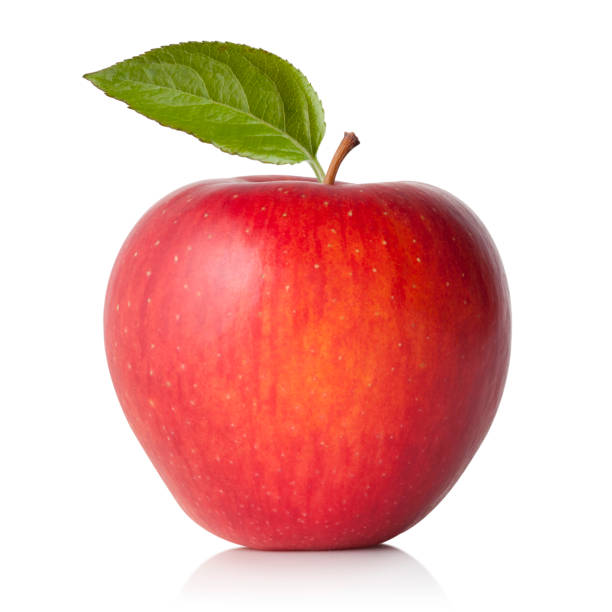

In [3]:
image = Image.open("apple.jpg")
image

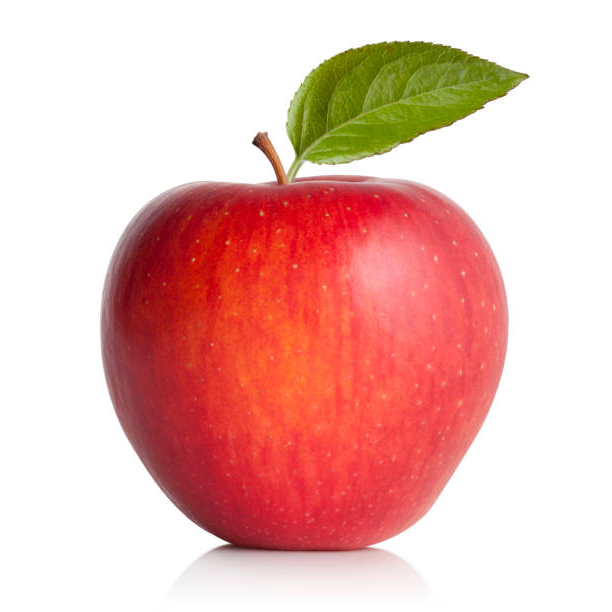

In [4]:
# Flips the image on the vertical axis (mirror)
flip = image.transpose(Image.FLIP_LEFT_RIGHT)
flip

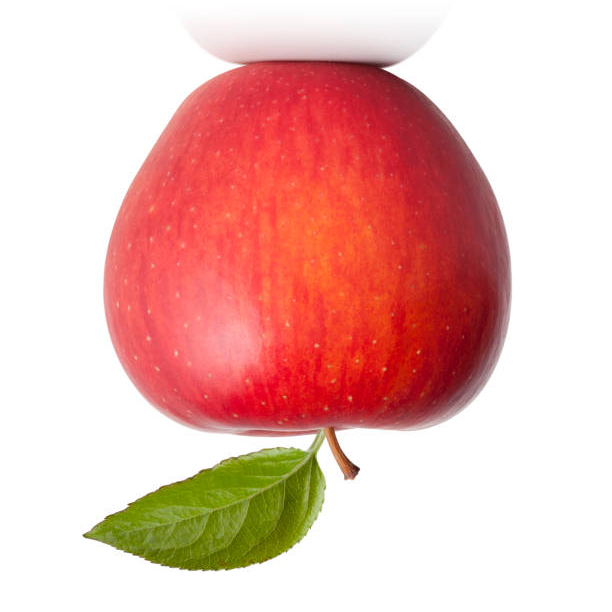

In [5]:
# Flips the image on the horizontal axis (upside down)
flip = image.transpose(Image.FLIP_TOP_BOTTOM)
flip

Alternately, the flips can be done using the PIL class ImageOps module.

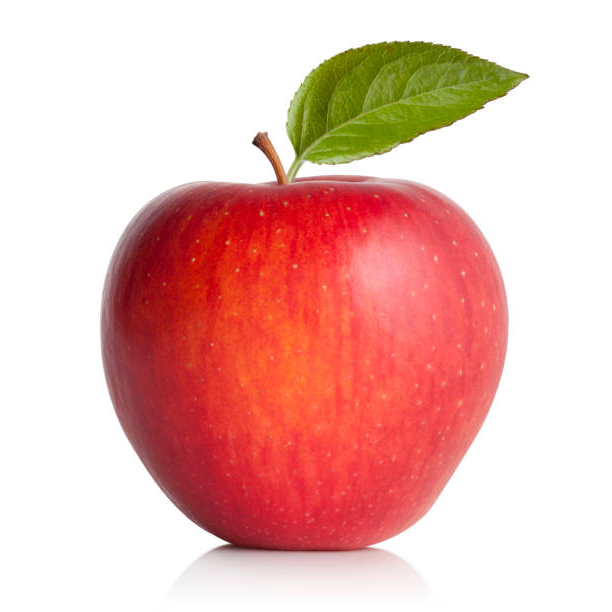

In [6]:
image = Image.open("apple.jpg")

# Flips the image on the vertical axis (mirror)
flip = ImageOps.mirror(image)
flip

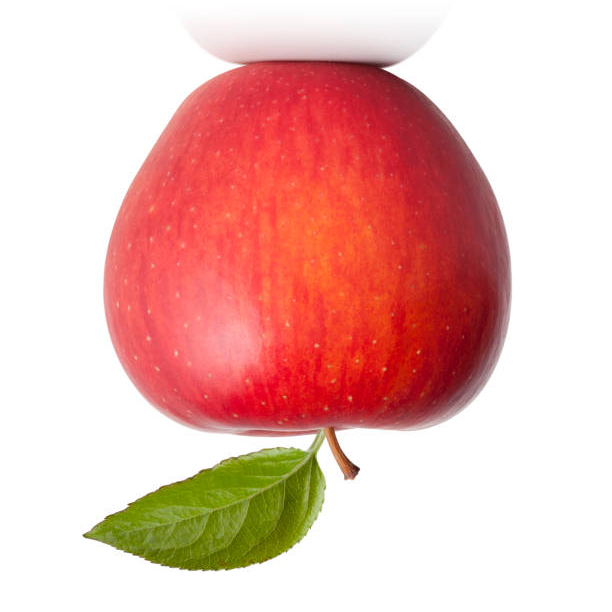

In [7]:
# Flips the image on the horizontal axis (upside down)
flip = ImageOps.flip(image)
flip

Let's see how to flip an image vertically (mirror) and horizontally
by using a matrix transpose method in OpenCV?

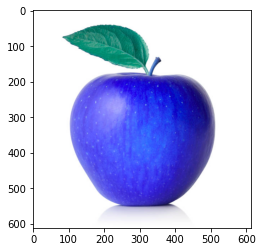

In [8]:
image = cv2.imread("apple.jpg")
# Displays the image in its original perspective
plt.imshow(image)

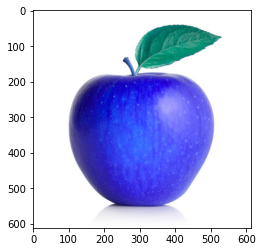

In [9]:
# Flips the image on the vertical axis (mirror)
flip = cv2.flip(image, 1)
plt.imshow(flip)

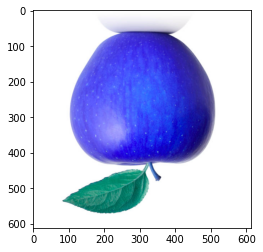

In [10]:
# Flips the image on the horizontal axis (upside down)
flip = cv2.flip(image, 0)
plt.imshow(flip)

Now, let's see how to flip an image vertically (mirror) and horizontally by
using a matrix transpose method in NumPy?

In [11]:
image = cv2.imread("apple.jpg")

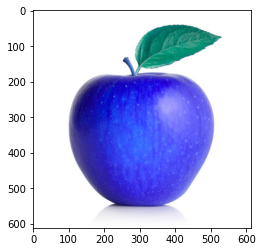

In [12]:
# Flips the image on the vertical axis (mirror)
flip = np.flip(image, 1)
plt.imshow(flip)

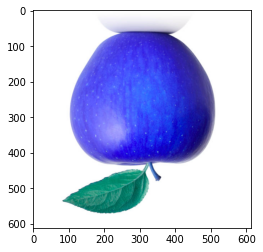

In [13]:
# Flips the image on the horizontal axis (upside down)
flip = np.flip(image, 0)
plt.imshow(flip)

###Image Rotation 90/180/270

In addition to flips, a matrix transpose operation can be used to rotate an image 90
degrees (left), 180 degrees, and 270 degrees (right). Like a flip, the operation is efficient,
does not require interpolation of pixels, and does not have a side effect of clipping.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/11.png?raw=1' width='800'/>

Let's see how to rotate an image 90, 180, and 270 degrees by using a
matrix transpose method in Python’s PIL imaging library?

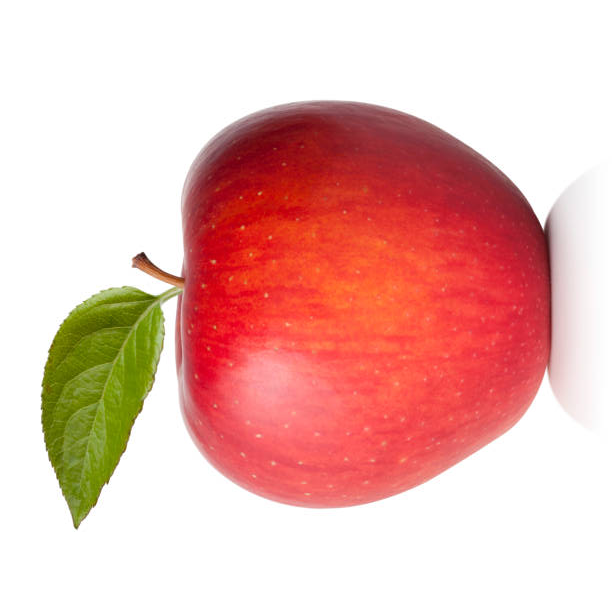

In [14]:
image = Image.open("apple.jpg")

# Rotates the image 90 degrees
rotate = image.transpose(Image.ROTATE_90)
rotate

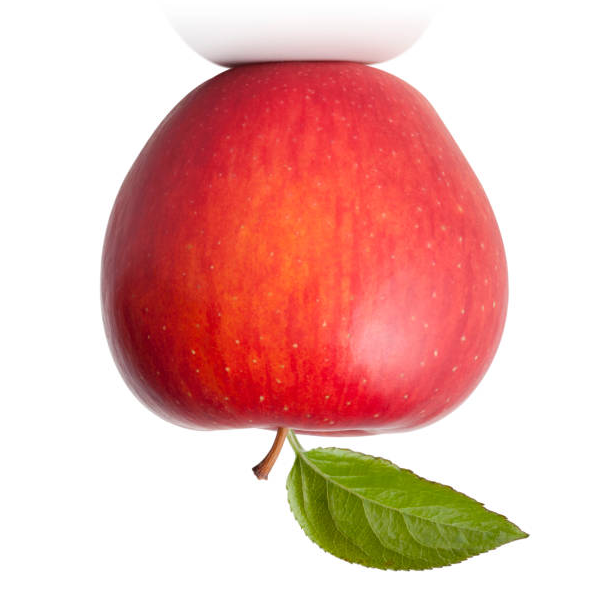

In [15]:
# Rotates the image 180 degrees
rotate = image.transpose(Image.ROTATE_180)
rotate

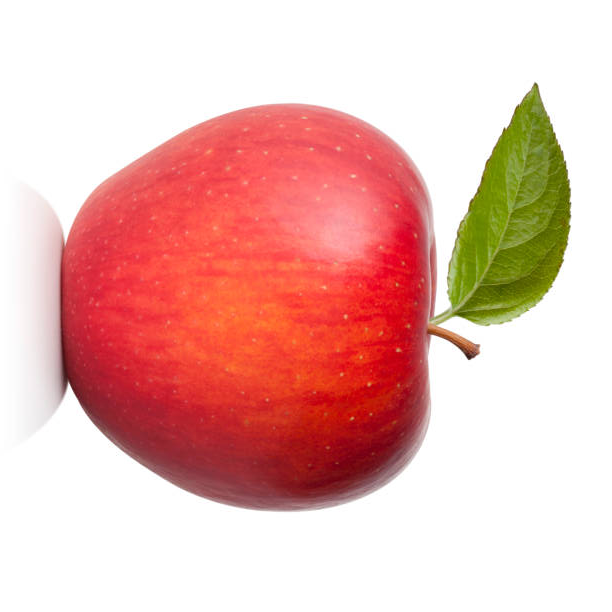

In [16]:
# Rotates the image 270 degrees
rotate = image.transpose(Image.ROTATE_270)
rotate

OpenCV does not have a transpose method for 90 or 270 degrees; you can do a 180 by using the flip method with a value of –1.

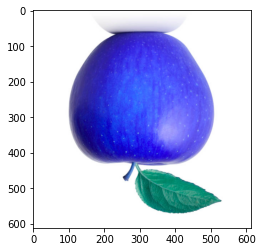

In [17]:
image = cv2.imread("apple.jpg")

# Rotates the image 180 degrees
rotate = cv2.flip(image, -1)
plt.imshow(rotate)

The next example demonstrates how to rotate an image 90, 180, and 270 degrees by
using the NumPy method rot90(), whose first parameter is the image to rotate 90
degrees, and the second parameter (k) is the number of times to perform the rotation:

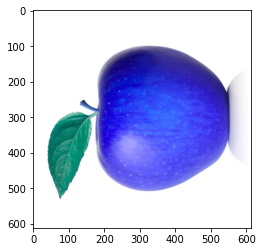

In [18]:
image = cv2.imread("apple.jpg")

# Rotates the image 90 degrees
rotate = np.rot90(image, 1)
plt.imshow(rotate)

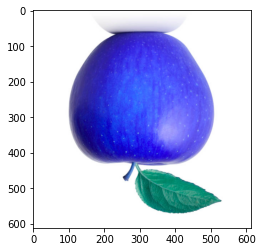

In [19]:
# Rotates the image 180 degrees
rotate = np.rot90(image, 2)
plt.imshow(rotate)

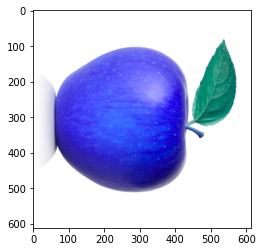

In [20]:
# Rotates the image 270 degrees
rotate = np.rot90(image, 3)
plt.imshow(rotate)

When flipping the image 90 or 270 degrees, you are changing the orientation of the
image, which is not a problem if the height and width of the image are the same. 

If
not, the height and width will be transposed in the rotated image and will not match the input vector of the neural network. In this case, you should use the imutils module
or other means to resize the image.

###Rotation

A rotation transforms an image by rotating it within –180 and 180 degrees. Generally,
the degree of rotation is randomly selected. You may also want to limit the range of
rotation to match the environment the model will be deployed in. Here are some
common practices:

- If the images will be dead-on, use a range of –15 to 15 degrees.
- If the images may be on an incline, use a range of –30 to 30 degrees.
- For small objects, like packages or money, use the full range of –180 to 180
degrees.

Another issue with rotation is that if you rotate an image
within the same-size boundaries, other than 90, 180, or 270, a
portion of the image’s edge will end up outside the boundary
(clipped).

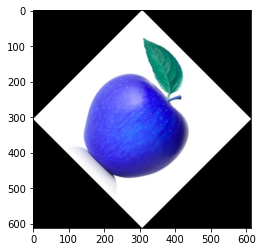

In [21]:
image = cv2.imread("apple.jpg")

# Remembers the original height and width
shape = (image.shape[0], image.shape[1])

# Rotates the image
rotate = imutils.rotate_bound(image, 45)

# Resizes the image back to its original shape
rotate = cv2.resize(rotate, shape, interpolation=cv2.INTER_AREA)
plt.imshow(rotate)

###Image shifting

A shift will shift the pixel data in the image +/– in the vertical (height) or horizontal
(width) axis. This will change the location in the image of the object being classified.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/12.png?raw=1' width='800'/>

The following code demonstrates shifting the image +/– 10% vertically and horizontally
by using the NumPy `np.roll()` method:

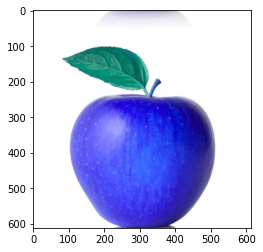

In [22]:
image = cv2.imread("apple.jpg")

# Gets the height and width of the image
height = image.shape[0]
width = image.shape[1]

# Shifts the image down by 10%
roll = np.roll(image, height // 10, axis=0)
plt.imshow(roll)

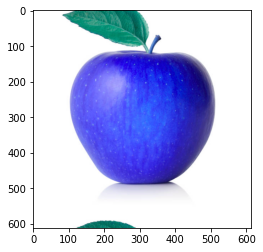

In [23]:
# Shifts the image up by 10%
roll = np.roll(image, -height // 10, axis=0)
plt.imshow(roll)

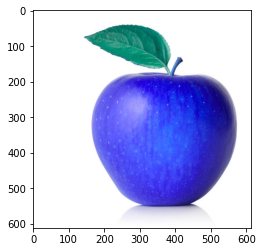

In [24]:
# Shifts the image right by 10%
roll = np.roll(image, width // 10, axis=1)
plt.imshow(roll)

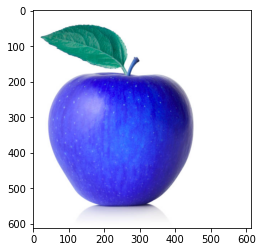

In [25]:
# Shifts the image left by 10%
roll = np.roll(image, -(width // 10), axis=1)
plt.imshow(roll)

A shift is efficient in that it is implemented as a roll operation
of the matrix; the rows (height) or columns (width) are
shifted. As such, the pixels that are shifted off the end are
added to the beginning.

If the shift is too large, the image can become fractured
into two pieces, with each piece opposing the other.

To avoid fracture, limiting the shift of the image to no
more than 20% is a general practice. Alternatively, we could crop the image and fill the cut-off space with a black pad, as demonstrated here using
OpenCV:

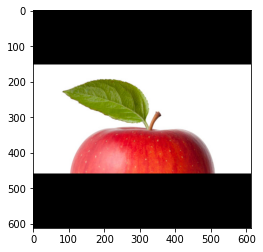

In [26]:
image = cv2.imread("apple.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gets the height and width of the image
height = image.shape[0]
width = image.shape[1]

# Drops the bottom (50%) of the image
image = image[0: height // 2, :, :]
# Makes black border to refit the image back to its original size
image = cv2.copyMakeBorder(image, (height//4), (height//4), 0, 0, cv2.BORDER_CONSTANT, 0)

plt.imshow(image)

##Scale invariance

This subsection covers how to manually augment images in a training dataset such that
the model learns to recognize the object in the image regardless of the object’s size.

For example, we want the model to recognize an apple regardless whether it takes up most
of the image or is a small fraction of the image overlaid on a background.

Scale invariance in the context of an image input includes the following:
- Zoom (object can be any size in the image)
- Affine (object can be viewed from any perspective)

###Zoom

Zoom transforms an image by zooming in from the center of the image, which is done
with a resize-and-crop operation. You find the center of the image, calculate the cropbounding
box around the center, and then crop the image.

When enlarging an image by using `Image.resize()` the
`Image.BICUBIC` interpolation generally provides the best
results.

Let's see how to zoom into an image
by using Python’s PIL imaging library.

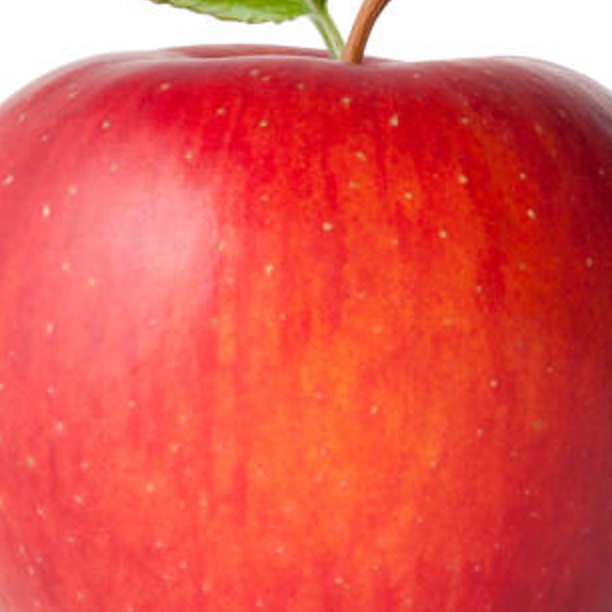

In [34]:
image = Image.open("apple.jpg")

# Remembers the original height, width of the image
zoom = 2
height, width = image.size

# Resizes (scale) the image proportional to the zoom
image = image.resize((int(height * zoom), int(width * zoom)), Image.BICUBIC)

# Finds the center of the scaled image
center = (image.size[0] // 2, image.size[1] // 2)

# Calculates the crop upper-left corner
crop = (int(center[0] // zoom), (int(center[1] // zoom)))

# Calculates the crop bounding box
box = (crop[0], crop[1], (center[0] + crop[0]), (center[1] + crop[1]))

image = image.crop(box)
image

Let's see how to zoom into an image by using the
OpenCV imaging library. 

When enlarging an image by using `cv2.resize()` interpolation,
`cv2.INTER_CUBIC` generally provides the best results. The interpolation
`cv2.INTER_LINEAR` is faster and provides nearly comparable results. The interpolation
`cv2.INTER_AREA` is generally used when reducing an image.

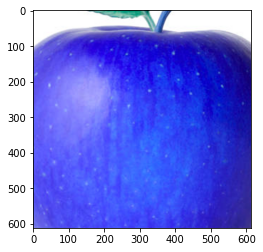

In [42]:
image = cv2.imread("apple.jpg")

zoom = 2

# Remembers the original height, width of the image
height, width = image.shape[:2]

# Finds the center of the scaled image
center = (image.shape[0] // 2, image.shape[1] // 2)
z_height = int(height // zoom)
z_width = int(width // zoom)

# Slices (cuts out) the zoomed image by forming a crop bounding box
image = image[(center[0] - z_height // 2) : (center[0] + z_height // 2), (center[1] - z_width // 2) : (center[1] + z_width // 2)]

# Resizes (enlarges) the cropped image back to the original size
image = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

plt.imshow(image)

##TF.Keras ImageDataGenerator